In [1]:
import pandas as pd
import wandb
import numpy as np
import pickle
import time
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.reset_defaults()
sns.reset_orig()
mpl.rcParams['text.usetex'] = True

sns.set(style="whitegrid", font_scale=1.3)
sns.set_palette("Dark2")
mpl.rcParams.update({
    "font.family": "serif",
    "font.size": 20,
    'figure.figsize': (5, 3),
    "text.usetex": True,
})
lw=1
mpl.rcParams['lines.markersize'] = 8     

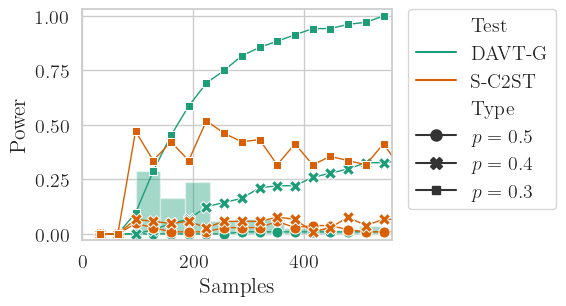

In [166]:
####### Rotation MNIST ##################
plt.figure(figsize=(4, 3))
df, stoppind_times = pickle.load(open("figures/data for the figures/mnist-rotation-experiment.pickle", "rb"))
stoppind_times  = stoppind_times[stoppind_times["stopping_time"]>0]
for t, color in zip([r"$p=0.3$"], sns.color_palette("Dark2")):
############## histograms ###############
    subset = stoppind_times[stoppind_times['type'] == t]
    weights = np.ones_like(subset['stopping_time']) / len(subset['stopping_time'])
    plt.hist(subset['stopping_time'], alpha=0.4, bins = 10, color=color, weights=weights) # add three 


############ lineplots ##################

sns.lineplot(data = df, x = 'Samples', y = 'Rejection Rate', hue = 'Test', linewidth = lw, style="Type", markers=True, dashes=False)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((-0.03,1.03))
plt.xlim((0,560))
plt.xlabel(r"Samples")
plt.ylabel(r"Power")

plt.savefig('figures/mnist-rr-cr.png', format='png', dpi=300, bbox_inches='tight')

plt.show()


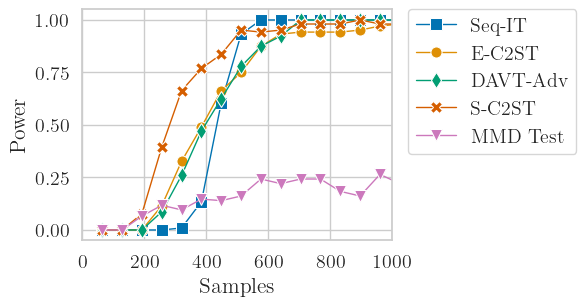

In [167]:
########## Adversarial Examples ###########
sns.set_palette("colorblind")
plt.figure(figsize=(4, 3))

bs=64
power_tb, power_ec2st, power_mmde, power_sc2st, power_mmd = pickle.load(open("figures/data for the figures/cifar-adv.pickle", "rb"))

n_list = np.arange(bs, bs*(len(power_tb)+1),bs)
sns.lineplot(x=n_list,y=power_tb, label="Seq-IT",  linestyle='-',marker="s",linewidth = lw)

n_list = np.arange(bs, bs*(len(power_ec2st)+1),bs)
sns.lineplot(x=n_list,y=power_ec2st, label="E-C2ST",  linestyle='-',marker="o",linewidth = lw)



n_list = np.arange(bs, bs*(len(power_mmde)+1),bs)
sns.lineplot(x=n_list,y=power_mmde,label="DAVT-Adv",   linestyle='-',marker="d", linewidth = lw)

n_list = np.arange(bs, bs*(len(power_sc2st)+1),bs)
sns.lineplot(x=n_list,y=power_sc2st, label="S-C2ST",   linestyle='-',marker="X",linewidth = lw)


n_list = np.arange(bs, bs*(len(power_mmd)+1),bs)
sns.lineplot(x=n_list,y=power_mmd, label="MMD Test",  linestyle='-',marker="v",linewidth = lw)

handles, labels = plt.gca().get_legend_handles_labels()

# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim((0,1000))

plt.xlabel("Samples")
plt.ylabel("Power")
#|plt.savefig('figures/cifar-power-cr.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

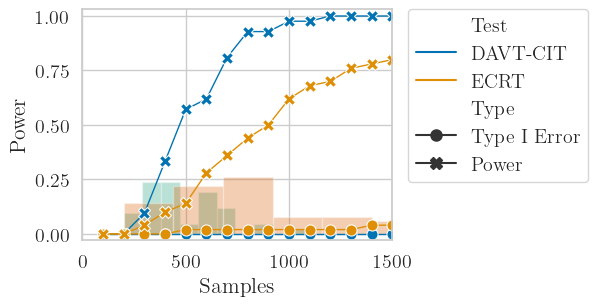

In [168]:
plt.figure(figsize=(4, 3))

########### CIT #################
df, stoppind_times = pickle.load( open("figures/data for the figures/cit.pickle", "rb"))
for stoppind_time_df, color in zip(stoppind_times, sns.color_palette("Dark2")):
############## histograms ###############
    subset = stoppind_time_df[stoppind_time_df['type'] == 'type2']
    weights = np.ones_like(subset['stopping_time']) / len(subset['stopping_time'])
    plt.hist(subset['stopping_time'], alpha=0.3, bins = 10, color=color, weights=weights)

############ lineplots ##################

sns.lineplot(data = df, x = 'Samples', y = 'Rejection Rate', hue = 'Test', linewidth = lw, style="Type", markers=True, dashes=False)



plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim((0,1500))
plt.ylim((-0.03,1.03))
#plt.yscale('log')
#plt.legend('',frameon=False)
plt.xlabel("Samples")
plt.ylabel("Power")

plt.savefig('figures/cit-cr.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


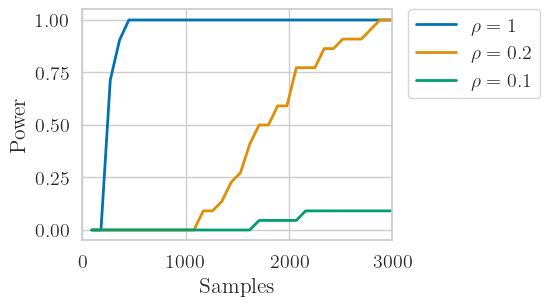

In [169]:
#################### Blob ######################
########## Correlation between X and Y #########
plt.figure(figsize=(4, 3))
bs=90
lw=2
power_1, power_02, power_01 = pickle.load(open("figures/data for the figures/blob-dependent.pickle", "rb"))
n_list = np.arange(bs, bs*(len(power_1)+1),bs)

sns.lineplot(x=n_list,y=power_1,label=r"$\rho=1$", linestyle='-',linewidth = lw)

n_list = np.arange(bs, bs*(len(power_02)+1),bs)
sns.lineplot(x=n_list,y=power_02, label=r"$\rho=0.2$",   linestyle='-',linewidth = lw)


n_list = np.arange(bs, bs*(len(power_01)+1),bs)
sns.lineplot(x=n_list,y=power_01,label=r"$\rho=0.1$",   linestyle='-',linewidth = lw)

plt.xlim((0,3000))

plt.xlabel("Samples")
plt.ylabel("Power")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('figures/blob-dependent-cr.png', format='png', dpi=300, bbox_inches='tight')

plt.show()





0    990
Name: stopping_time, dtype: int64
0    810
Name: stopping_time, dtype: int64
0    900
Name: stopping_time, dtype: int64


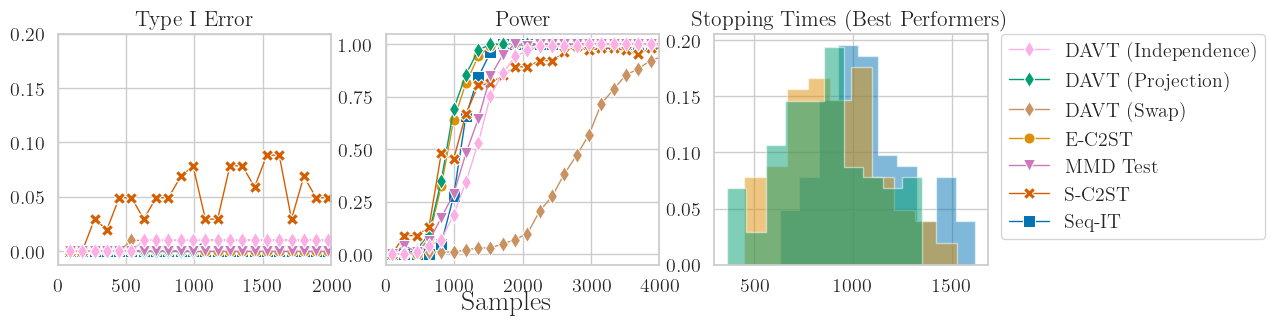

In [5]:
############## High capacity NN #################

err_tb, err_ec2st, err_proj,err_sc2st,err_mmd,err_swap,err_indep,power_tb,power_ec2st,power_proj,power_sc2st,power_mmd,power_swap,power_indep=pickle.load(open("figures/data for the figures/blob-two-sample-cr.pickle", "rb"))
stoppind_time_df_tb, stoppind_time_df_ec2st,stoppind_time_df_proj = pickle.load( open("figures/data for the figures/blob-two-sample-stopping_times.pickle", "rb"))

fig, ax =plt.subplots(1,3, figsize=(12, 3))
mpl.rcParams['text.usetex'] = True

sns.set(style="whitegrid", font_scale=1.3)
sns.set_palette("colorblind")
mpl.rcParams.update({
    "font.family": "serif",
    "font.size": 20,
    'figure.figsize': (5, 3),
    "text.usetex": True,
})
lw=1
mpl.rcParams['lines.markersize'] = 8     

# ############ histograms ##################

for stoppind_time_df, color in zip([stoppind_time_df_tb, stoppind_time_df_ec2st,stoppind_time_df_proj], sns.color_palette("colorblind")):
    subset = stoppind_time_df[stoppind_time_df['type'] == 'type2']
    weights = np.ones_like(subset['stopping_time']) / len(subset['stopping_time'])
    print(subset['stopping_time'].mode())
    ax[2].hist(subset['stopping_time'], alpha=0.5, bins = 10, color=color, weights=weights,histtype='stepfilled')
ax[2].set_title("Stopping Times (Best Performers)")
# ############ lineplots ##################

n_list = np.arange(90, 90*(len(err_tb)+1),90)
sns.lineplot(x=n_list ,y=err_tb , label="Seq-IT",  linestyle='-',marker="s",linewidth = lw,  ax=ax[0], legend='brief')

n_list = np.arange(90, 90*(len(err_ec2st)+1),90)
sns.lineplot(x=n_list ,y=err_ec2st , label="E-C2ST",  linestyle='-',marker="o",  linewidth = lw,  ax=ax[0], legend='brief')

n_list = np.arange(90, 90*(len(err_proj)+1),90)
sns.lineplot(x=n_list ,y=err_proj ,label="DVAT (Swap, Projection)",  linestyle='-',marker="d",  linewidth = lw,  ax=ax[0], legend='brief')


n_list = np.arange(90, 90*(len(err_sc2st)+1),90)
sns.lineplot(x=n_list ,y=err_sc2st , label="S-C2ST", linestyle='-',marker="X", linewidth = lw,  ax=ax[0], legend='brief')

n_list = np.arange(90, 90*(len(err_mmd)+1),90)
sns.lineplot(x=n_list ,y=err_mmd , label="MMD Test",  linestyle='-',marker="v", linewidth = lw,  ax=ax[0], legend='brief')

n_list = np.arange(90, 90*(len(err_swap)+1),90)
sns.lineplot(x=n_list ,y=err_swap ,label="DVAT (Swap)",   linestyle='-',marker="d", linewidth = lw,  ax=ax[0], legend='brief')

n_list = np.arange(90, 90*(len(err_indep)+1),90)
sns.lineplot(x=n_list ,y=err_indep , label="DVAT (Independence)",   linestyle='-',marker="d",  linewidth = lw,  ax=ax[0], legend='brief')


ax[0].set_xlim((0,2000))
ax[0].set_title("Type I Error")
ax[0].get_legend().remove()

#############################################
n_list = np.arange(90, 90*(len(power_tb)+1),90)
sns.lineplot(x=n_list[::2],y=power_tb[::2], label="Seq-IT",  linestyle='-',marker="s",   linewidth = lw,  ax=ax[1])
n_list = np.arange(90, 90*(len(power_ec2st)+1),90)
sns.lineplot(x=n_list[::2],y=power_ec2st[::2], label="E-C2ST", linestyle='-',marker="o", linewidth = lw,  ax=ax[1])


n_list = np.arange(90, 90*(len(power_proj)+1),90)
sns.lineplot(x=n_list[::2],y=power_proj[::2],label="DAVT (Projection)",   linestyle='-',marker="d", linewidth = lw,  ax=ax[1])

n_list = np.arange(90, 90*(len(power_sc2st)+1),90)
sns.lineplot(x=n_list[::2],y=power_sc2st[::2], label="S-C2ST", linestyle='-',marker="X",  linewidth = lw,  ax=ax[1])

n_list = np.arange(90, 90*(len(power_mmd)+1),90)
sns.lineplot(x=n_list[::2],y=power_mmd[::2], label="MMD Test", linestyle='-',marker="v", linewidth = lw,  ax=ax[1])

n_list = np.arange(90, 90*(len(power_swap)+1),90)

sns.lineplot(x=n_list[::2],y=power_swap[::2],label="DAVT (Swap)",  linestyle='-',marker="d",linewidth = lw,  ax=ax[1])

n_list = np.arange(90, 90*(len(power_indep)+1),90)
sns.lineplot(x=n_list[::2],y=power_indep[::2], label="DAVT (Independence)",    linestyle='-',marker="d", linewidth = lw,  ax=ax[1])

handles, labels = ax[1].get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))

plt.legend(handles, labels,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax[1].get_legend().remove()
ax[1].set_xlim((0,4000))
ax[0].set_ylim((-0.0125,0.2))

ax[1].set_title("Power")

fig.text(0.5, -0.04, 'Samples', ha='center')
plt.savefig('figures/blob-two-sample-cr.png', format='png', dpi=300, bbox_inches='tight')
plt.show()



0    1620
Name: stopping_time, dtype: int64
0    1710
Name: stopping_time, dtype: int64
0    1260
1    1440
2    1530
Name: stopping_time, dtype: int64


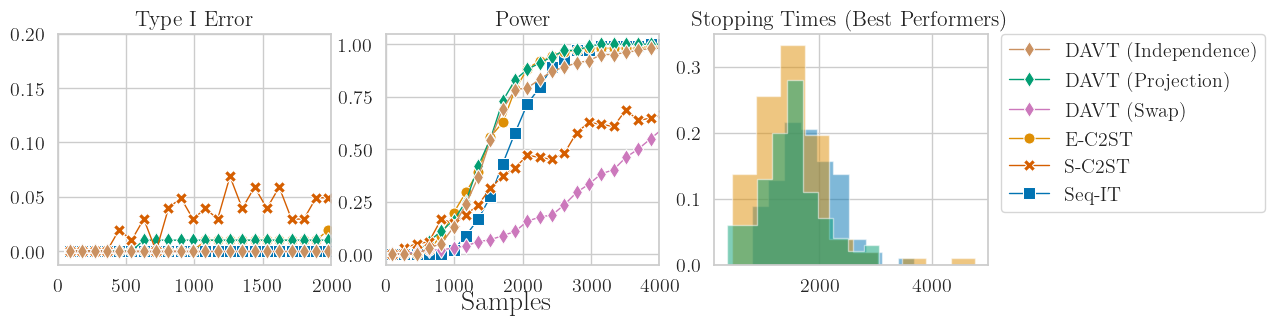

In [8]:
############### Low capacity NN ###############


err_tb, err_ec2st, err_proj,err_sc2st,err_swap,err_indep,power_tb,power_ec2st,power_proj,power_sc2st,power_swap,power_indep=pickle.load(open("figures/data for the figures/blob-two-sample-low.pickle", "rb"))
stoppind_time_df_tb, stoppind_time_df_ec2st,stoppind_time_df_proj = pickle.load( open("figures/data for the figures/blob-two-sample-stopping_times-low.pickle", "rb"))
fig, ax =plt.subplots(1,3, figsize=(12, 3))
mpl.rcParams['text.usetex'] = True

sns.set(style="whitegrid", font_scale=1.3)
sns.set_palette("colorblind")
mpl.rcParams.update({
    "font.family": "serif",
    "font.size": 20,
    'figure.figsize': (5, 3),
    "text.usetex": True,
})
lw=1
mpl.rcParams['lines.markersize'] = 8     


# ############ histograms ##################

for stoppind_time_df, color in zip([stoppind_time_df_tb, stoppind_time_df_ec2st,stoppind_time_df_proj], sns.color_palette("colorblind")):
    subset = stoppind_time_df[stoppind_time_df['type'] == 'type2']
    weights = np.ones_like(subset['stopping_time']) / len(subset['stopping_time'])
    print(subset['stopping_time'].mode())
    ax[2].hist(subset['stopping_time'], alpha=0.5, bins = 10, color=color, weights=weights,histtype='stepfilled')
ax[2].set_title("Stopping Times (Best Performers)")
# ############ lineplots ##################

n_list = np.arange(90, 90*(len(err_tb)+1),90)
sns.lineplot(x=n_list ,y=err_tb , label="Seq-IT",  linestyle='-',marker="s",linewidth = lw,  ax=ax[0], legend='brief')

n_list = np.arange(90, 90*(len(err_ec2st)+1),90)
sns.lineplot(x=n_list ,y=err_ec2st , label="E-C2ST",  linestyle='-',marker="o",  linewidth = lw,  ax=ax[0], legend='brief')

n_list = np.arange(90, 90*(len(err_proj)+1),90)
sns.lineplot(x=n_list ,y=err_proj ,label="DVAT (Swap, Projection)",  linestyle='-',marker="d",  linewidth = lw,  ax=ax[0], legend='brief')


n_list = np.arange(90, 90*(len(err_sc2st)+1),90)
sns.lineplot(x=n_list ,y=err_sc2st , label="S-C2ST", linestyle='-',marker="X", linewidth = lw,  ax=ax[0], legend='brief')


n_list = np.arange(90, 90*(len(err_swap)+1),90)
sns.lineplot(x=n_list ,y=err_swap ,label="DVAT (Swap)",   linestyle='-',marker="d", linewidth = lw,  ax=ax[0], legend='brief')

n_list = np.arange(90, 90*(len(err_indep)+1),90)
sns.lineplot(x=n_list ,y=err_indep , label="DVAT (Independence)",   linestyle='-',marker="d",  linewidth = lw,  ax=ax[0], legend='brief')


ax[0].set_xlim((0,2000))
ax[0].set_title("Type I Error")
ax[0].get_legend().remove()

#############################################
n_list = np.arange(90, 90*(len(power_tb)+1),90)
sns.lineplot(x=n_list[::2],y=power_tb[::2], label="Seq-IT",  linestyle='-',marker="s",   linewidth = lw,  ax=ax[1])
n_list = np.arange(90, 90*(len(power_ec2st)+1),90)
sns.lineplot(x=n_list[::2],y=power_ec2st[::2], label="E-C2ST", linestyle='-',marker="o", linewidth = lw,  ax=ax[1])


n_list = np.arange(90, 90*(len(power_proj)+1),90)
sns.lineplot(x=n_list[::2],y=power_proj[::2],label="DAVT (Projection)",   linestyle='-',marker="d", linewidth = lw,  ax=ax[1])

n_list = np.arange(90, 90*(len(power_sc2st)+1),90)
sns.lineplot(x=n_list[::2],y=power_sc2st[::2], label="S-C2ST", linestyle='-',marker="X",  linewidth = lw,  ax=ax[1])

n_list = np.arange(90, 90*(len(power_swap)+1),90)

sns.lineplot(x=n_list[::2],y=power_swap[::2],label="DAVT (Swap)",  linestyle='-',marker="d",linewidth = lw,  ax=ax[1])

n_list = np.arange(90, 90*(len(power_indep)+1),90)
sns.lineplot(x=n_list[::2],y=power_indep[::2], label="DAVT (Independence)",    linestyle='-',marker="d", linewidth = lw,  ax=ax[1])

handles, labels = ax[1].get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))

plt.legend(handles, labels,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax[1].get_legend().remove()
ax[1].set_xlim((0,4000))
ax[0].set_ylim((-0.0125,0.2))

ax[1].set_title("Power")

fig.text(0.5, -0.04, 'Samples', ha='center')
plt.savefig('figures/blob-two-sample-low-cr.png', format='png', dpi=300, bbox_inches='tight')
plt.show()



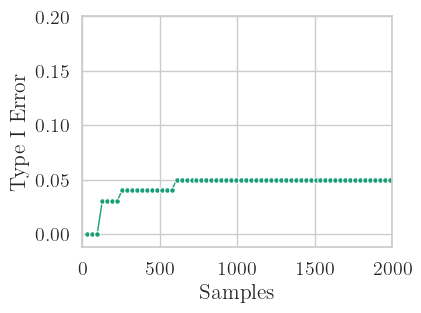

In [135]:
plt.figure(figsize=(4, 3))
df = pickle.load(open(f"figures/data for the figures/blob-type-I.pickle", "rb"))
sns.lineplot(df, x="Samples",y="Rejection Rate",     linestyle='-',marker=".", linewidth = lw)
handles, labels = ax[1].get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))

plt.ylim((-0.0125,0.2))
plt.xlim((-0.0125,2000))
plt.xlabel("Samples")
plt.ylabel("Type I Error")
plt.savefig('figures/blob-type-I-cr.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
